# Missing values imputation	

In [1]:
import copy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ds_functions as ds
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import sklearn.metrics as metrics
from sklearn.tree import DecisionTreeClassifier
from numpy import percentile

data: pd.DataFrame = pd.read_csv('datasets/heart_failure_clinical_records_dataset.csv')
target = 'DEATH_EVENT'

In [2]:
original_data = copy.deepcopy(data)

imp = SimpleImputer(strategy='constant', fill_value=-1, missing_values=np.nan, copy=True)
imp.fit(data.values)
mat = imp.transform(data.values)
data = pd.DataFrame(mat, columns=data.columns)
data.describe(include='all')

if False in original_data == data: 
    print ("Dataset as changed")
else :
    print ("Dataset as not change")

Dataset as not change


# Outliers imputation

In [3]:
data

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0.0,582.0,0.0,20.0,1.0,265000.00,1.9,130.0,1.0,0.0,4.0,1.0
1,55.0,0.0,7861.0,0.0,38.0,0.0,263358.03,1.1,136.0,1.0,0.0,6.0,1.0
2,65.0,0.0,146.0,0.0,20.0,0.0,162000.00,1.3,129.0,1.0,1.0,7.0,1.0
3,50.0,1.0,111.0,0.0,20.0,0.0,210000.00,1.9,137.0,1.0,0.0,7.0,1.0
4,65.0,1.0,160.0,1.0,20.0,0.0,327000.00,2.7,116.0,0.0,0.0,8.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0.0,61.0,1.0,38.0,1.0,155000.00,1.1,143.0,1.0,1.0,270.0,0.0
295,55.0,0.0,1820.0,0.0,38.0,0.0,270000.00,1.2,139.0,0.0,0.0,271.0,0.0
296,45.0,0.0,2060.0,1.0,60.0,0.0,742000.00,0.8,138.0,0.0,0.0,278.0,0.0
297,45.0,0.0,2413.0,0.0,38.0,0.0,140000.00,1.4,140.0,1.0,1.0,280.0,0.0


In [4]:
def remove_outliers(data):
    rows_to_drop=set()
    for var in data:
        val_max = data[var].max()
        val_min = data[var].min()
    #     print(val_max)
    #     print(val_min)
        quartiles = percentile(data[var], [25, 50, 75])
    #     print (quartiles)

        iqr = quartiles[2] - quartiles[0]

        lower_val_aceptable = quartiles[0] - 1.5*iqr
        max_val_aceptable = quartiles[2] + 1.5*iqr

    #     print (lower_val_aceptable)
    #     print (max_val_aceptable)


        if val_max > max_val_aceptable or val_min < lower_val_aceptable:
            print(var + " as outliers")
            count=0
            outliers_num = 0
            for ele in data[var]:
                if ele > max_val_aceptable or ele < lower_val_aceptable:
                    outliers_num+=1
                    rows_to_drop.add(count)
                count+=1
            print("Outliers number = ",outliers_num)
            print("Outliers percentage = ",round((outliers_num*100)/len(data[var]),3))
            print()
    clean_data = data.drop(rows_to_drop, axis=0)
    return clean_data

In [5]:
def update_outliers(original_data, clean_data):
    columns_to_update=[]
    for var in original_data:
        val_max = original_data[var].max()
        val_min = original_data[var].min()
    #     print(val_max)
    #     print(val_min)
        quartiles = percentile(original_data[var], [25, 50, 75])
    #     print (quartiles)

        iqr = quartiles[2] - quartiles[0]

        lower_val_aceptable = quartiles[0] - 1.5*iqr
        max_val_aceptable = quartiles[2] + 1.5*iqr

    #     print (lower_val_aceptable)
    #     print (max_val_aceptable)
        elements_to_update = []

        if val_max > max_val_aceptable or val_min < lower_val_aceptable:
            print(var + " as outliers")
            count=0
            outliers_num = 0
            for ele in original_data[var]:
                if ele > max_val_aceptable or ele < lower_val_aceptable:
                    outliers_num+=1
                    elements_to_update.append(ele)
#             print("Outliers number = ",outliers_num)
#             print("Outliers percentage = ",round((outliers_num*100)/len(original_data[var]),3))
#             print()
        dic = {var:elements_to_update}
        
        columns_to_update.append(dic)
        
        
    updated_data = copy.deepcopy(original_data)
    
    for dic in columns_to_update:
        key = list(dic.keys())[0]
        values = list(dic.values())[0]
               
        if len(values) != 0:
            mean_var = clean_data[key].mean()
            mean_list = list([mean_var]*len(values))
                        
            updated_data[key] = updated_data[key].replace(values,mean_list)
            
    return updated_data

In [6]:
clean_data = remove_outliers(data)

creatinine_phosphokinase as outliers
Outliers number =  29
Outliers percentage =  9.699

ejection_fraction as outliers
Outliers number =  2
Outliers percentage =  0.669

platelets as outliers
Outliers number =  21
Outliers percentage =  7.023

serum_creatinine as outliers
Outliers number =  29
Outliers percentage =  9.699

serum_sodium as outliers
Outliers number =  4
Outliers percentage =  1.338



In [7]:
updated_data = update_outliers(data, clean_data)

creatinine_phosphokinase as outliers
ejection_fraction as outliers
platelets as outliers
serum_creatinine as outliers
serum_sodium as outliers


In [8]:
data.mean()

age                             60.833893
anaemia                          0.431438
creatinine_phosphokinase       581.839465
diabetes                         0.418060
ejection_fraction               38.083612
high_blood_pressure              0.351171
platelets                   263358.029264
serum_creatinine                 1.393880
serum_sodium                   136.625418
sex                              0.648829
smoking                          0.321070
time                           130.260870
DEATH_EVENT                      0.321070
dtype: float64

In [9]:
clean_data.mean()

age                             60.809527
anaemia                          0.468750
creatinine_phosphokinase       336.941964
diabetes                         0.419643
ejection_fraction               38.178571
high_blood_pressure              0.379464
platelets                   255865.190045
serum_creatinine                 1.128571
serum_sodium                   137.044643
sex                              0.642857
smoking                          0.321429
time                           132.651786
DEATH_EVENT                      0.272321
dtype: float64

In [10]:
updated_data.mean()

age                             60.833893
anaemia                          0.431438
creatinine_phosphokinase       332.723468
diabetes                         0.418060
ejection_fraction               37.837315
high_blood_pressure              0.351171
platelets                   254752.908833
serum_creatinine                 1.135447
serum_sodium                   136.873507
sex                              0.648829
smoking                          0.321070
time                           130.260870
DEATH_EVENT                      0.321070
dtype: float64

In [11]:
print("Number of removed rows: ",len(data)-len(clean_data))
print(f"Percentage of removed rows: {round((len(data)-len(clean_data))*100/len(data),2)} %")

Number of removed rows:  75
Percentage of removed rows: 25.08 %


In [12]:
# data.pop('DEATH_EVENT').values
# clean_data.pop('DEATH_EVENT').values
# print()

In [29]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler


transf = StandardScaler(with_mean=True, with_std=True, copy=True).fit(data)
df_nr = pd.DataFrame(transf.transform(data), columns= data.columns)
norm_data_zscore = copy.deepcopy(df_nr)
norm_data_zscore.describe(include='all')


transf = MinMaxScaler(feature_range=(0, 1), copy=True).fit(df_nr)
df_nr = pd.DataFrame(transf.transform(df_nr), columns= df_nr.columns)
norm_data_minmax = copy.deepcopy(df_nr)
norm_data_minmax.describe(include='all')


transf = StandardScaler(with_mean=True, with_std=True, copy=True).fit(clean_data)
df_nr_clean = pd.DataFrame(transf.transform(clean_data), columns= clean_data.columns)
norm_data_zscore_clean = copy.deepcopy(df_nr_clean)
norm_data_zscore_clean.describe(include='all')


transf = MinMaxScaler(feature_range=(0, 1), copy=True).fit(clean_data)
df_nr_clean = pd.DataFrame(transf.transform(clean_data), columns= clean_data.columns)
norm_data_minmax_clean = copy.deepcopy(df_nr_clean)
norm_data_minmax_clean.describe(include='all')
print()


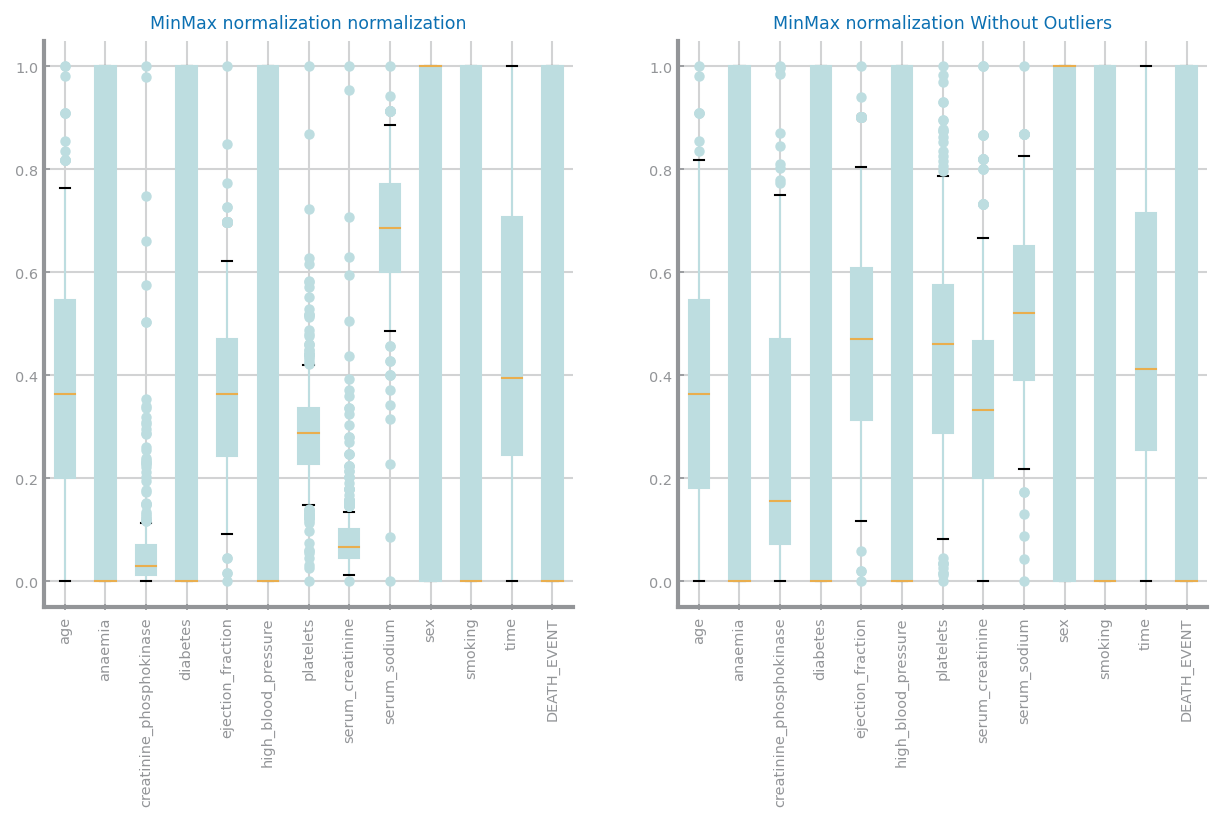

In [30]:
fig, axs = plt.subplots(1, 2, figsize=(10,5),squeeze=False )
axs[0, 0].set_title('MinMax normalization normalization')
norm_data_minmax.boxplot(ax=axs[0, 0])
axs[0, 1].set_title('MinMax normalization Without Outliers')
# axs[0, 2].xticks(rotation=90)
norm_data_minmax_clean.boxplot(ax=axs[0, 1])
# fig.tight_layout()
for i in range(2):
    plt.setp(axs[0, i].xaxis.get_majorticklabels(), rotation=90)
    
plt.show()

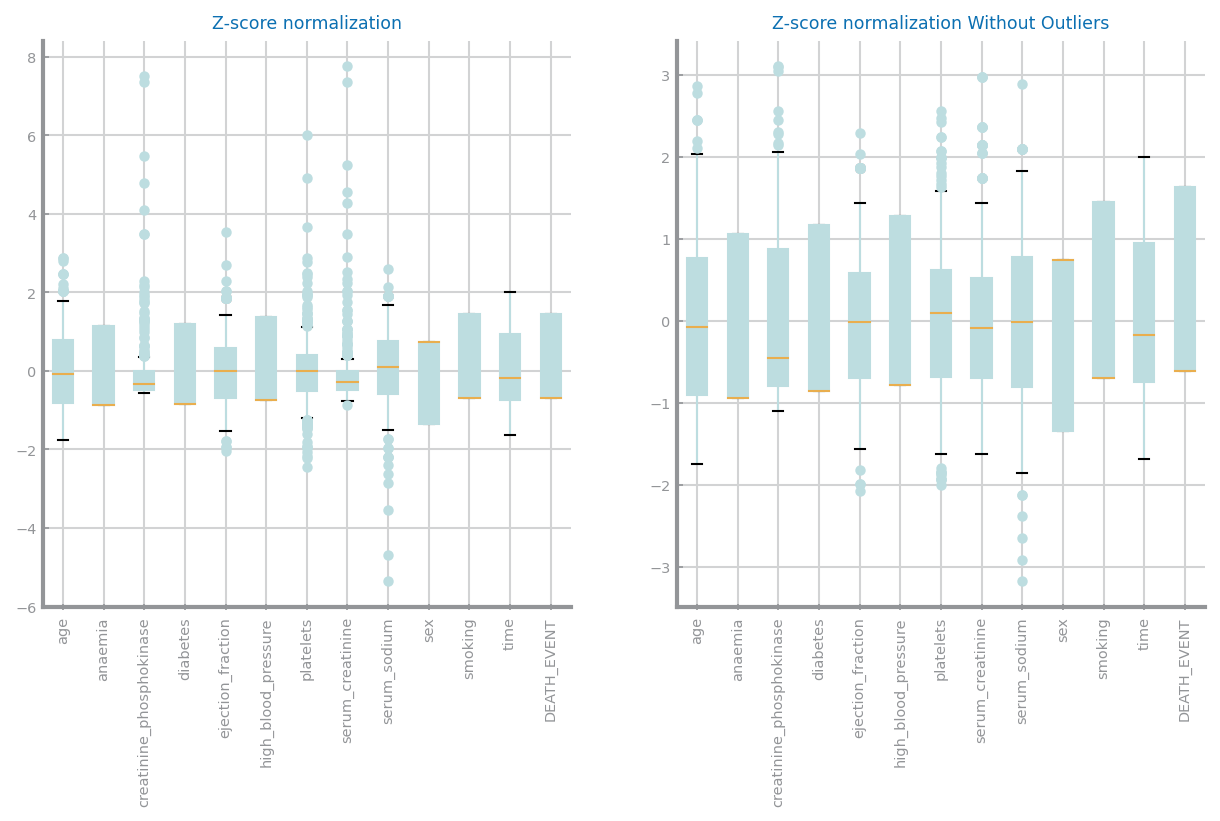

In [31]:
fig, axs = plt.subplots(1, 2, figsize=(10,5),squeeze=False )
axs[0, 0].set_title('Z-score normalization')
norm_data_zscore.boxplot(ax=axs[0, 0])
axs[0, 1].set_title('Z-score normalization Without Outliers')
# axs[0, 2].xticks(rotation=90)
norm_data_zscore_clean.boxplot(ax=axs[0, 1])
# fig.tight_layout()
for i in range(2):
    plt.setp(axs[0, i].xaxis.get_majorticklabels(), rotation=90)
    
plt.show()

# Decision Trees

<Figure size 600x450 with 0 Axes>

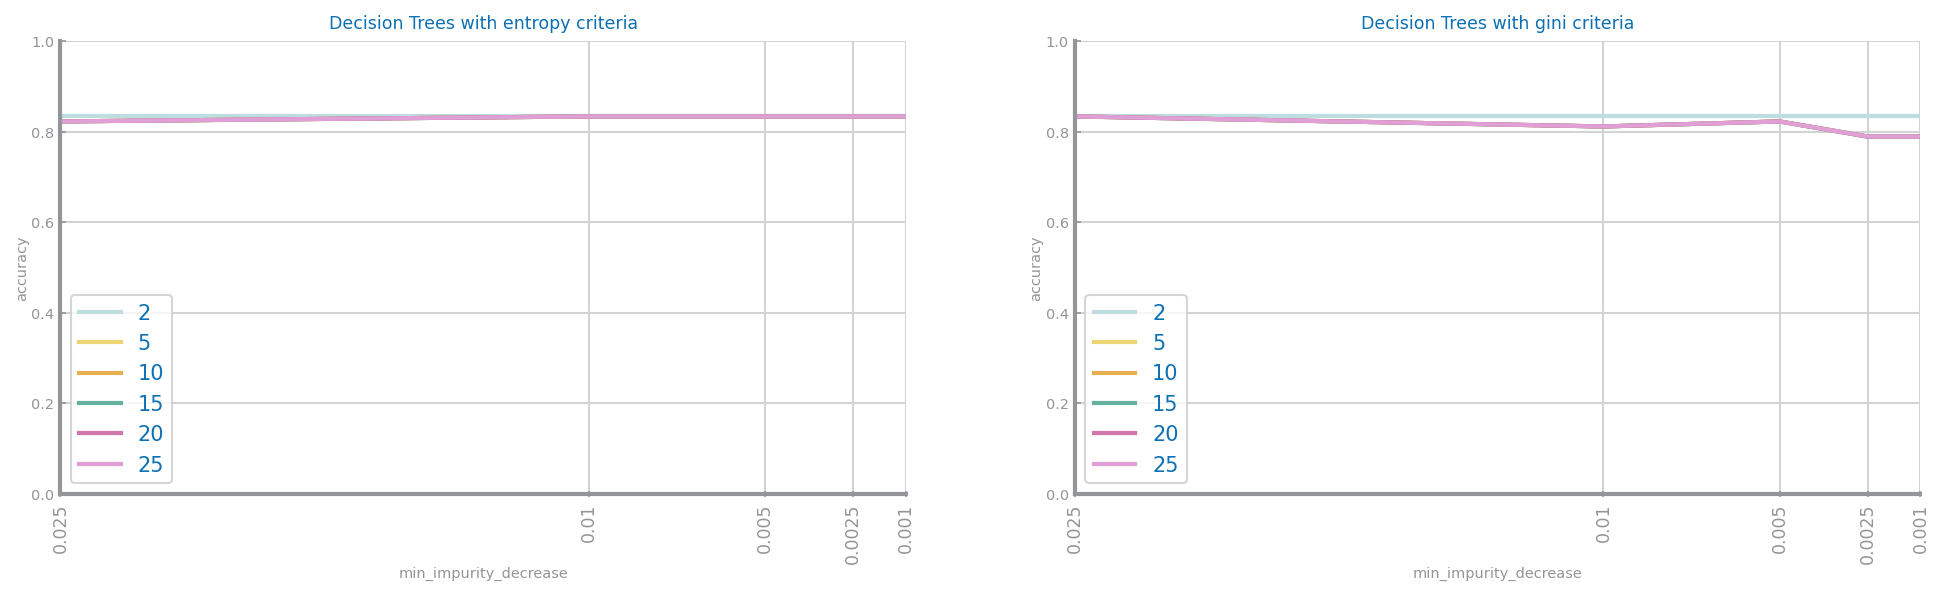

Best results achieved with entropy criteria, depth=2 and min_impurity_decrease=0.03 ==> accuracy=0.83


In [32]:
data: pd.DataFrame = pd.read_csv('datasets/heart_failure_clinical_records_dataset.csv')
original_data = copy.deepcopy(data)
y: np.ndarray = original_data.pop('DEATH_EVENT').values
X: np.ndarray = original_data.values
labels = pd.unique(y)

trnX, tstX, trnY, tstY = train_test_split(X, y, train_size=0.7, stratify=y)

min_impurity_decrease = [0.025, 0.01, 0.005, 0.0025, 0.001]
max_depths = [2, 5, 10, 15, 20, 25]
criteria = ['entropy', 'gini']
best = ('',  0, 0.0)
last_best = 0
best_tree = None
n = 6
plt.figure()
fig, axs = plt.subplots(1, 2, figsize=(16, 4), squeeze=False)
for k in range(len(criteria)):
    f = criteria[k]
    values = {}
    for d in max_depths:
        yvalues = []
        for imp in min_impurity_decrease:
            tree = DecisionTreeClassifier(min_samples_leaf=n, max_depth=d, criterion=f, min_impurity_decrease=imp)
            tree.fit(trnX, trnY)
            prdY = tree.predict(tstX)
            yvalues.append(metrics.accuracy_score(tstY, prdY))
            if yvalues[-1] > last_best:
                best = (f, d, imp)
                last_best = yvalues[-1]
                best_tree = tree

        values[d] = yvalues
    ds.multiple_line_chart(min_impurity_decrease, values, ax=axs[0, k], title='Decision Trees with %s criteria'%f,
                           xlabel='min_impurity_decrease', ylabel='accuracy', percentage=True)

plt.show()
print('Best results achieved with %s criteria, depth=%d and min_impurity_decrease=%1.2f ==> accuracy=%1.2f'%(best[0], best[1], best[2], last_best))

### Decision Trees with normalized data

<Figure size 600x450 with 0 Axes>

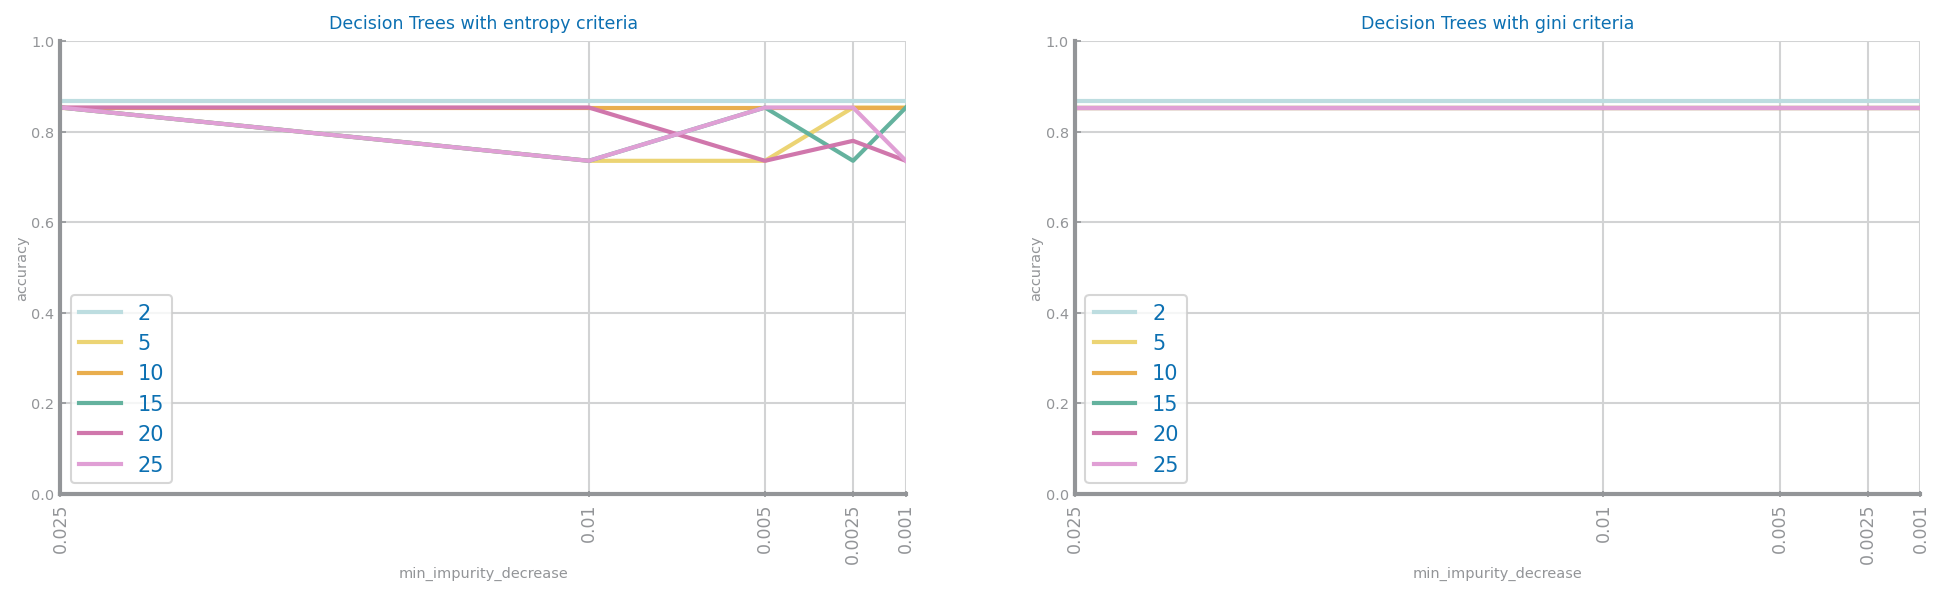

Best results achieved with entropy criteria, depth=2 and min_impurity_decrease=0.03 ==> accuracy=0.87


In [33]:
minmax_clean = copy.deepcopy(norm_data_minmax_clean)
y: np.ndarray = minmax_clean.pop('DEATH_EVENT').values
X: np.ndarray = minmax_clean.values
labels = pd.unique(y)
trnX, tstX, trnY, tstY = train_test_split(X, y, train_size=0.7, stratify=y)

min_impurity_decrease = [0.025, 0.01, 0.005, 0.0025, 0.001]
max_depths = [2, 5, 10, 15, 20, 25]
criteria = ['entropy', 'gini']
best = ('',  0, 0.0)
last_best = 0
best_tree = None
n = 5
plt.figure()
fig, axs = plt.subplots(1, 2, figsize=(16, 4), squeeze=False)
for k in range(len(criteria)):
    f = criteria[k]
    values = {}
    for d in max_depths:
        yvalues = []
        for imp in min_impurity_decrease:
            tree = DecisionTreeClassifier(min_samples_leaf=n, max_depth=d, criterion=f, min_impurity_decrease=imp)
            tree.fit(trnX, trnY)
            prdY = tree.predict(tstX)
            yvalues.append(metrics.accuracy_score(tstY, prdY))
            if yvalues[-1] > last_best:
                best = (f, d, imp)
                last_best = yvalues[-1]
                best_tree = tree

        values[d] = yvalues
    ds.multiple_line_chart(min_impurity_decrease, values, ax=axs[0, k], title='Decision Trees with %s criteria'%f,
                           xlabel='min_impurity_decrease', ylabel='accuracy', percentage=True)

plt.show()
print('Best results achieved with %s criteria, depth=%d and min_impurity_decrease=%1.2f ==> accuracy=%1.2f'%(best[0], best[1], best[2], last_best))

Confusion Matrix Test
TruePositives:  15
FalsePositives:  5
TrueNegatives:  44
FalseNegatives:  4


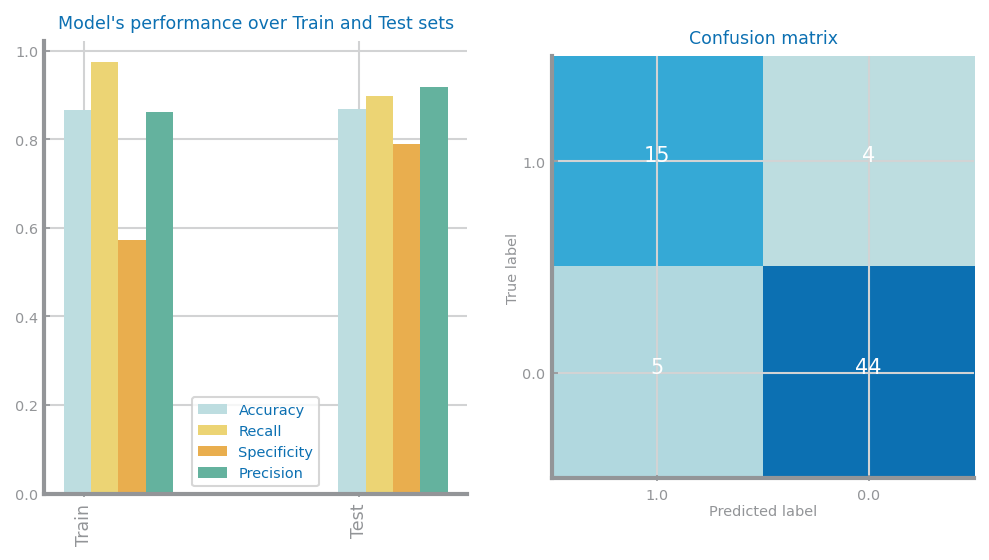

In [34]:
prd_trn = best_tree.predict(trnX)
prd_tst = best_tree.predict(tstX)
ds.plot_evaluation_results(pd.unique(y), trnY, prd_trn, tstY, prd_tst)

In [35]:
def decision_tree_kfold(num_splits_kfold, data, n=5, stratified=True):
    orig_data = copy.deepcopy(data)
    y: np.ndarray = orig_data.pop('DEATH_EVENT').values
    X: np.ndarray = orig_data.values
    labels = pd.unique(y)
    
    if stratified:
        cv = StratifiedKFold(n_splits=num_splits_kfold, random_state=50,shuffle=False)
        cv_split = cv.split(X, y)
    else:
        cv = KFold(n_splits=num_splits_kfold, random_state=50,shuffle=False)
        cv_split = cv.split(X)
        

    for train_index, test_index in cv_split:
        trnX, tstX = X[train_index], X[test_index]
        trnY, tstY = y[train_index], y[test_index]
        best = ('',  0, 0.0)
        last_best = 0
        best_tree = None

        min_impurity_decrease = [0.025, 0.01, 0.005, 0.0025, 0.001]
        max_depths = [2, 5, 10, 15, 20, 25]
        criteria = ['entropy', 'gini']
        plt.figure()
        fig, axs = plt.subplots(1, 2, figsize=(16, 4), squeeze=False)
        for k in range(len(criteria)):
            f = criteria[k]
            values = {}
            for d in max_depths:
                yvalues = []
                for imp in min_impurity_decrease:
                    tree = DecisionTreeClassifier(min_samples_leaf=n, max_depth=d, criterion=f, min_impurity_decrease=imp)
                    tree.fit(trnX, trnY)
                    prdY = tree.predict(tstX)
                    yvalues.append(metrics.accuracy_score(tstY, prdY))
                    if yvalues[-1] > last_best:
                        best = (f, d, imp)
                        last_best = yvalues[-1]
                        best_tree = tree

                values[d] = yvalues
            ds.multiple_line_chart(min_impurity_decrease, values, ax=axs[0, k], title='Decision Trees with %s criteria'%f,
                                   xlabel='min_impurity_decrease', ylabel='accuracy', percentage=True)

        plt.show()
        print('Best results achieved with %s criteria, depth=%d and min_impurity_decrease=%1.2f ==> accuracy=%1.2f'%(best[0], best[1], best[2], last_best))
    prd_trn = best_tree.predict(trnX)
    prd_tst = best_tree.predict(tstX)
    ds.plot_evaluation_results(pd.unique(y), trnY, prd_trn, tstY, prd_tst)

<Figure size 600x450 with 0 Axes>

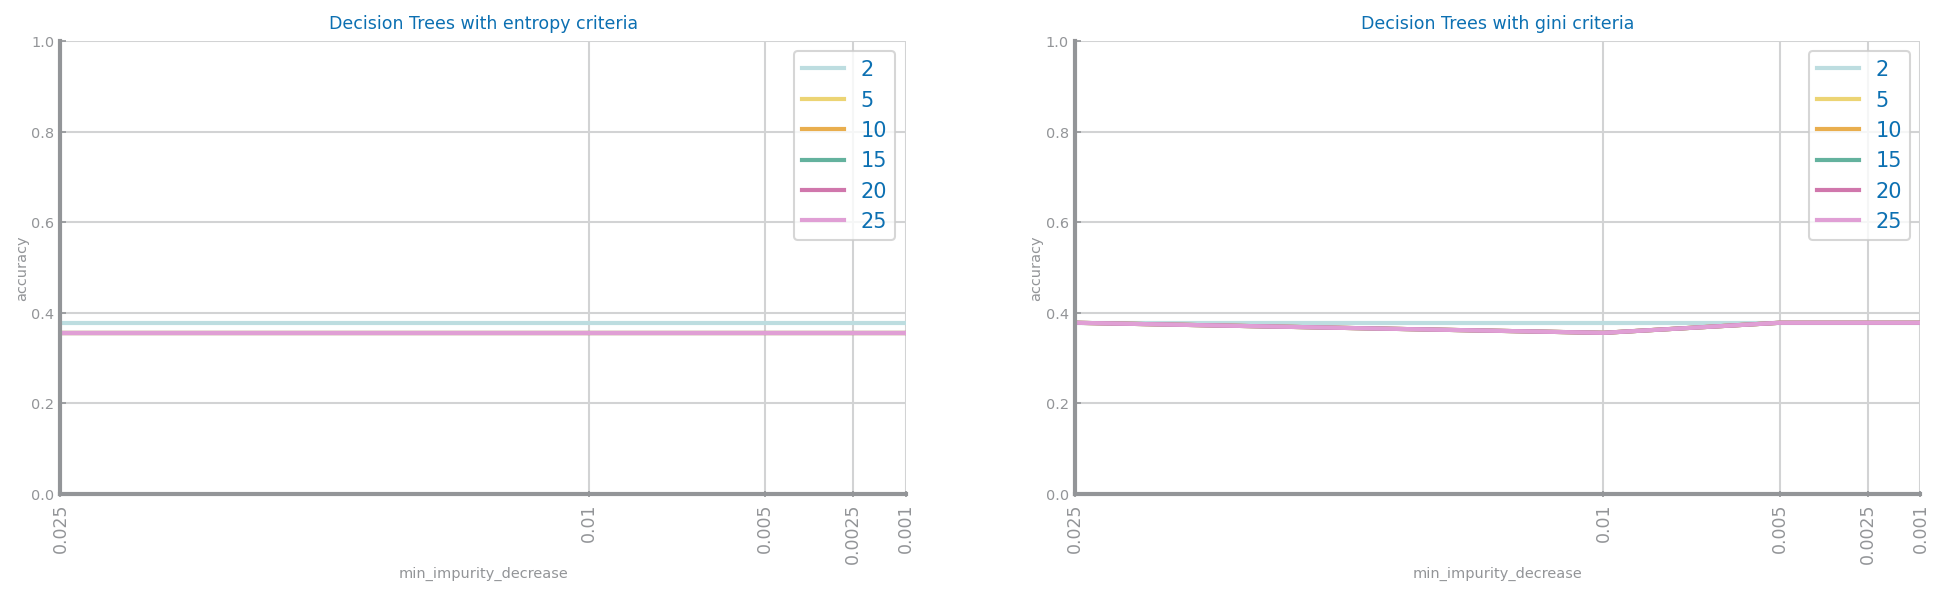

Best results achieved with entropy criteria, depth=2 and min_impurity_decrease=0.03 ==> accuracy=0.38


<Figure size 600x450 with 0 Axes>

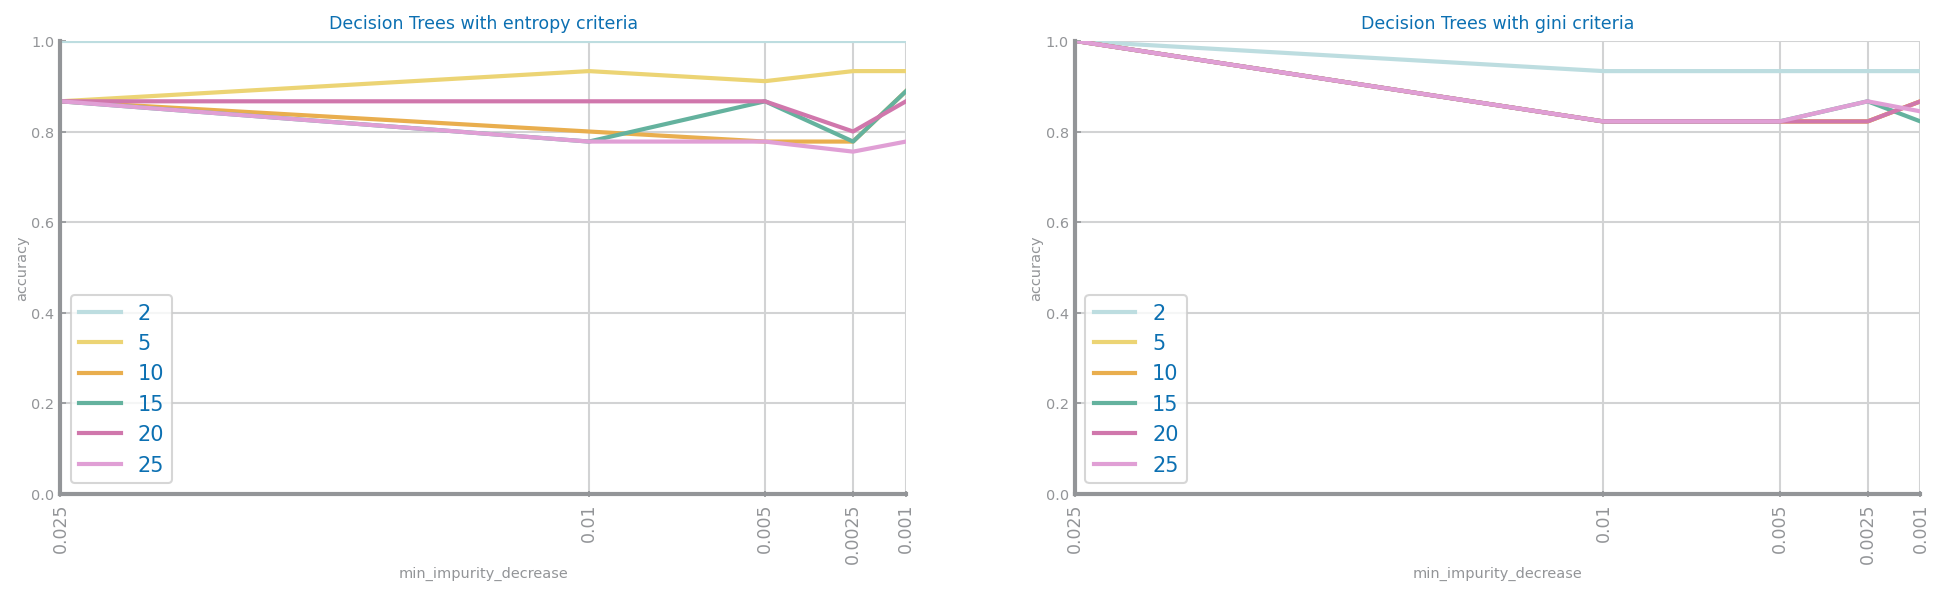

Best results achieved with entropy criteria, depth=2 and min_impurity_decrease=0.03 ==> accuracy=1.00


<Figure size 600x450 with 0 Axes>

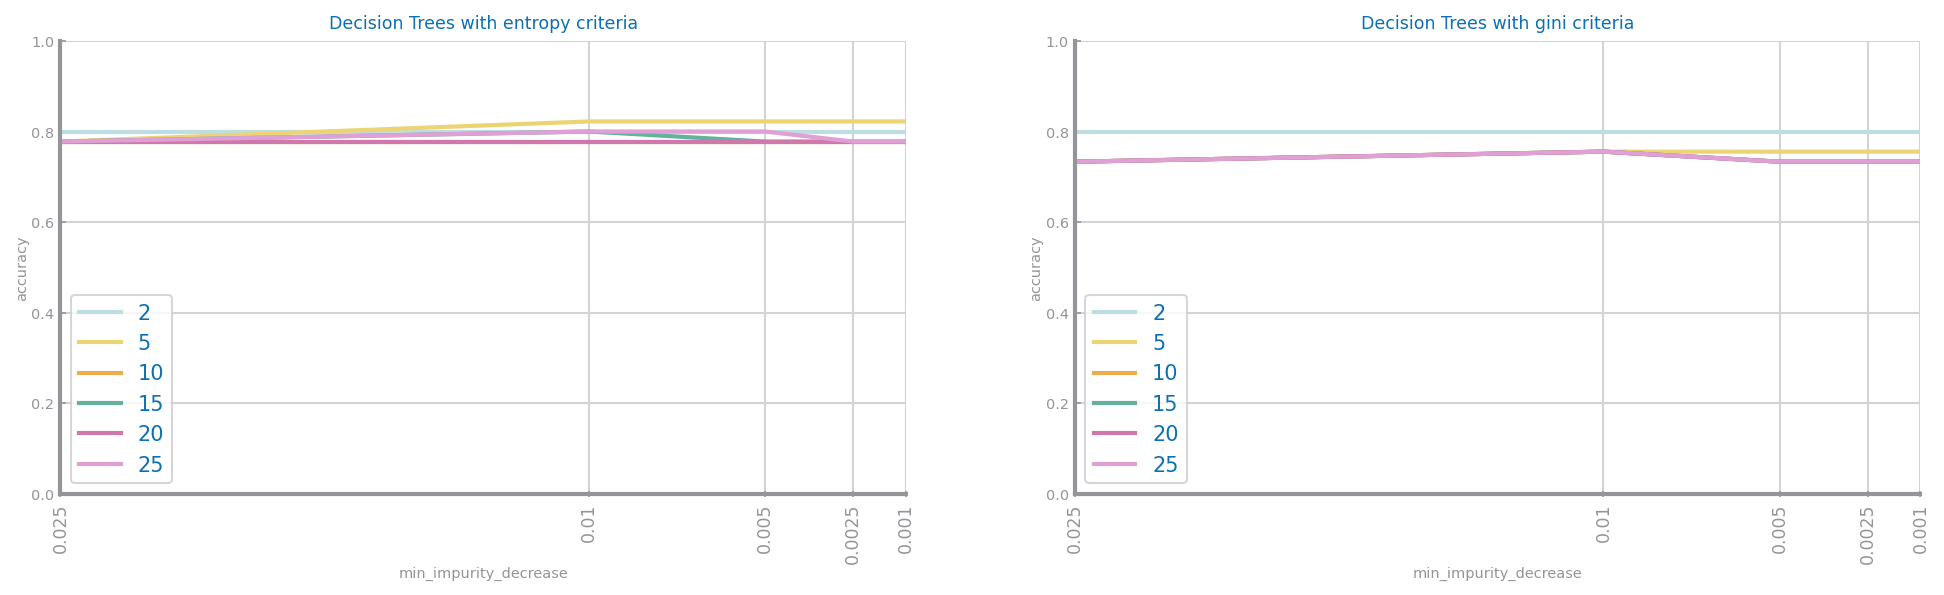

Best results achieved with entropy criteria, depth=5 and min_impurity_decrease=0.01 ==> accuracy=0.82


<Figure size 600x450 with 0 Axes>

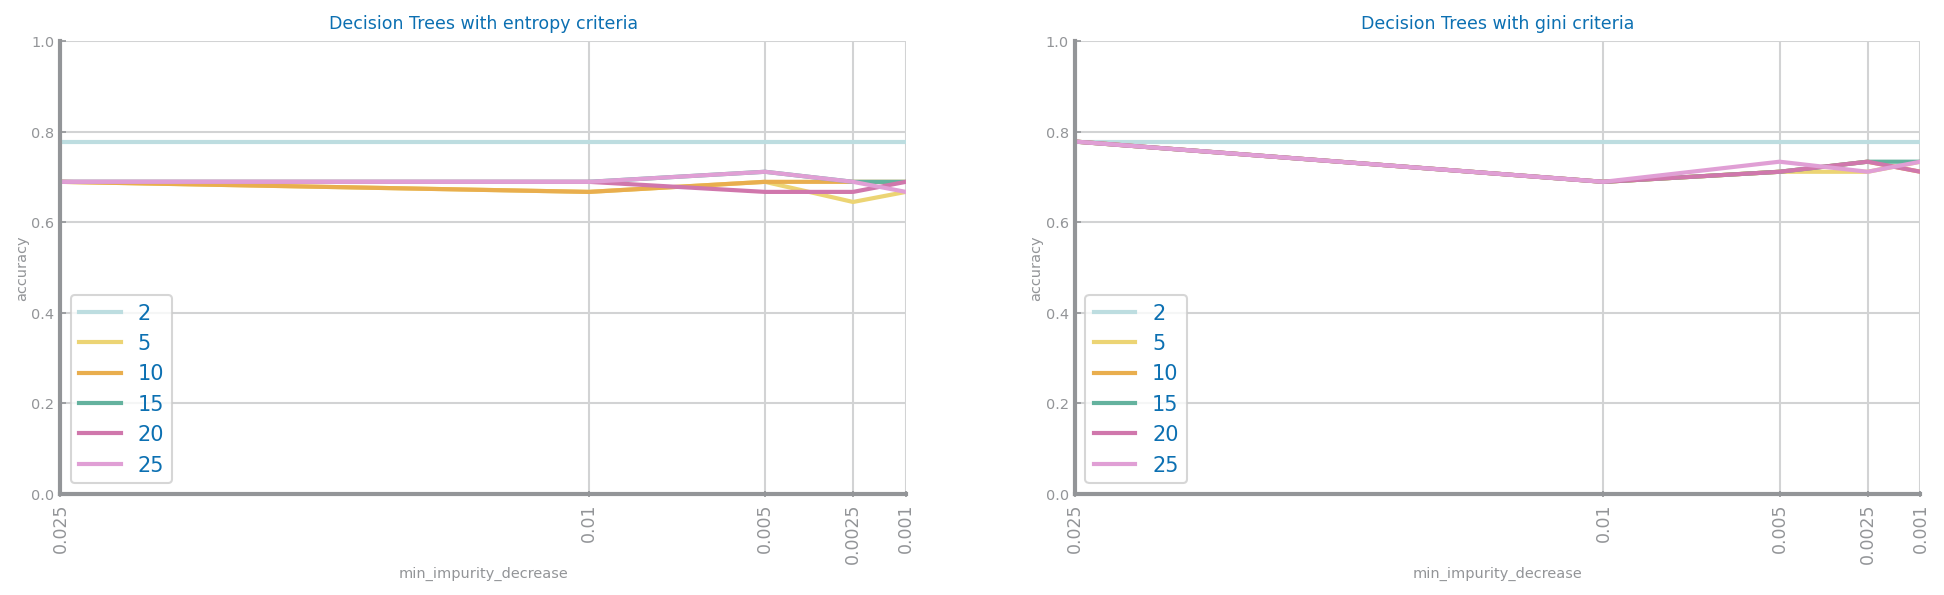

Best results achieved with entropy criteria, depth=2 and min_impurity_decrease=0.03 ==> accuracy=0.78


<Figure size 600x450 with 0 Axes>

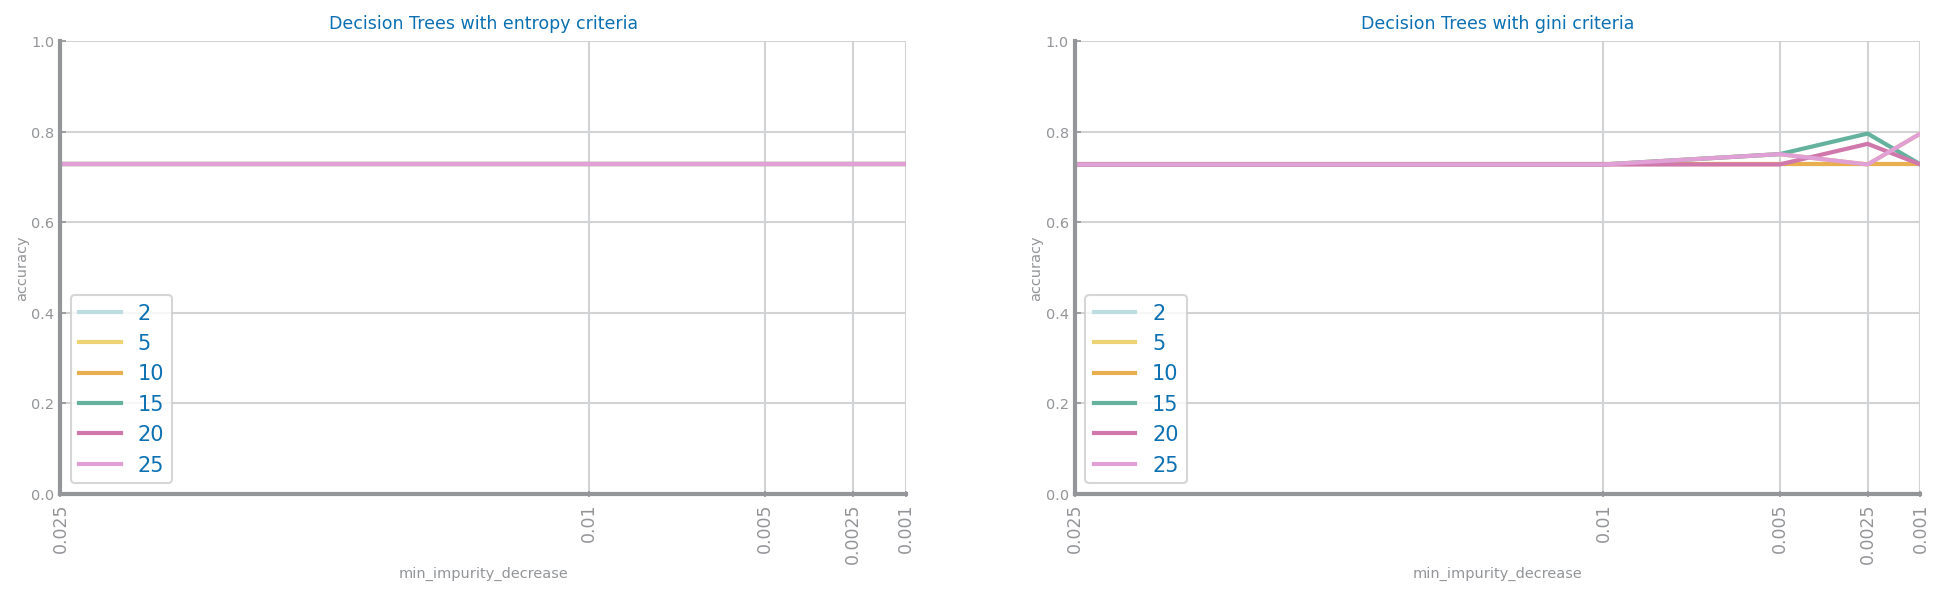

Best results achieved with gini criteria, depth=5 and min_impurity_decrease=0.00 ==> accuracy=0.80
Confusion Matrix Test
TruePositives:  3
FalsePositives:  0
TrueNegatives:  32
FalseNegatives:  9


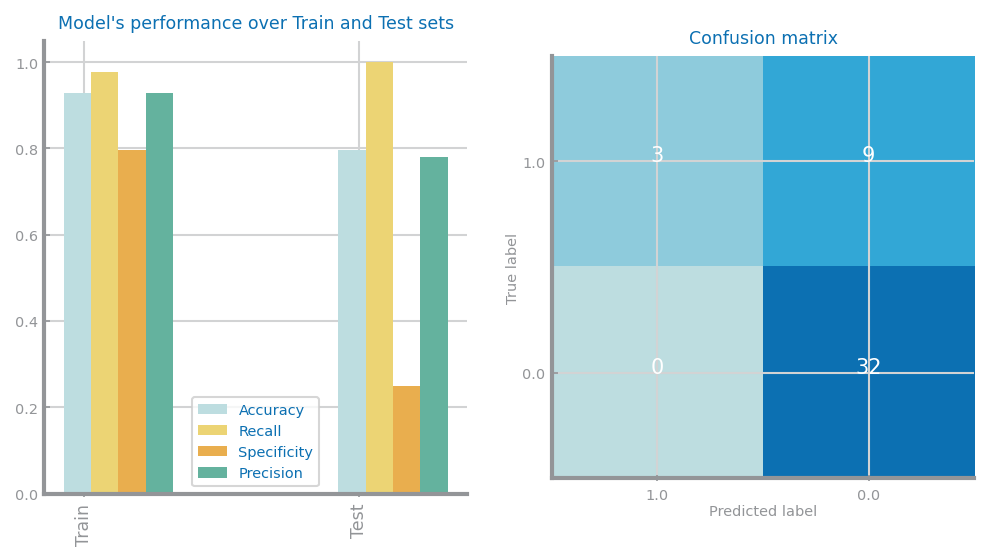

In [37]:
decision_tree_kfold(num_splits_kfold=5, data=norm_data_minmax_clean,n=3, stratified=True)

<Figure size 600x450 with 0 Axes>

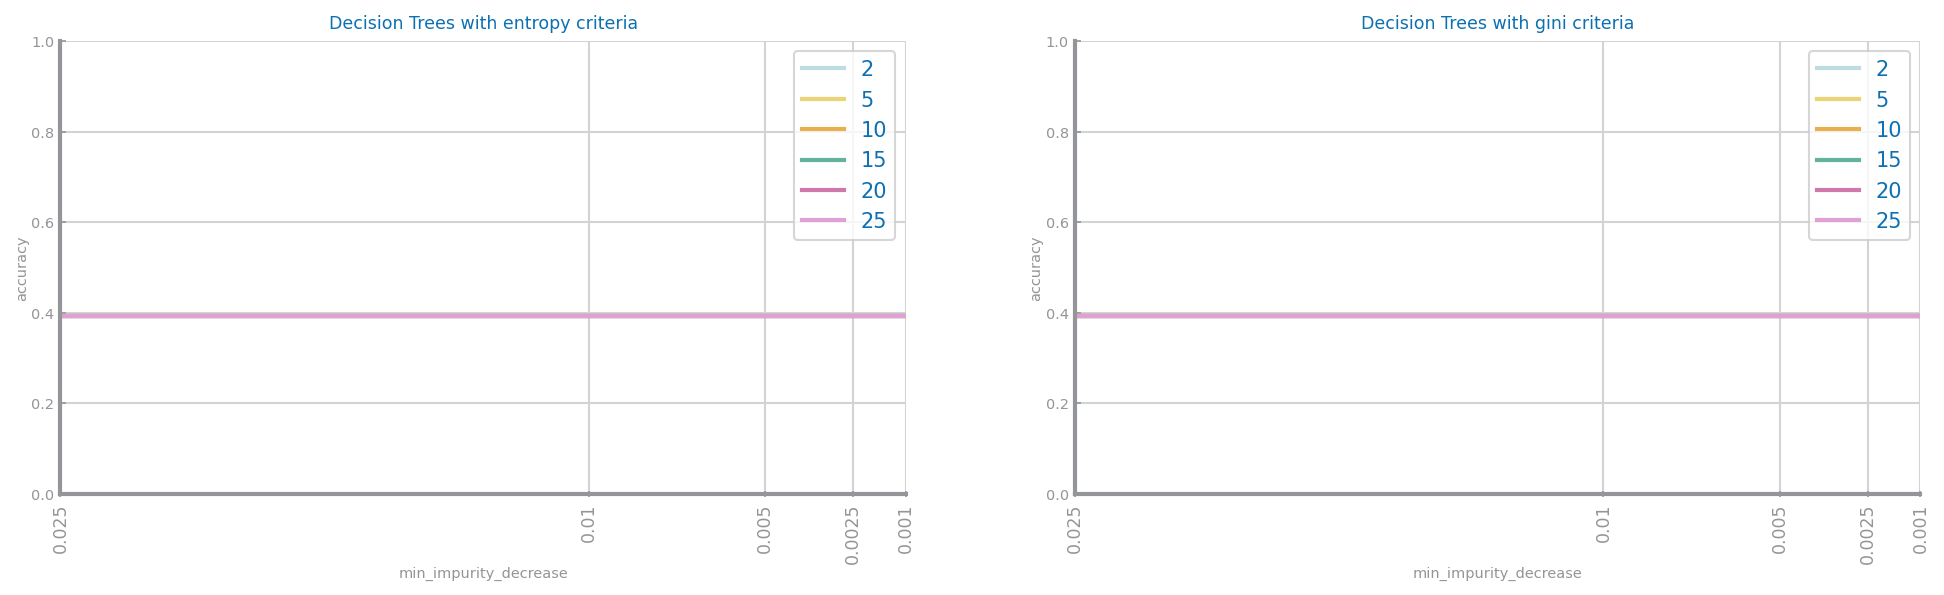

Best results achieved with entropy criteria, depth=2 and min_impurity_decrease=0.03 ==> accuracy=0.39


<Figure size 600x450 with 0 Axes>

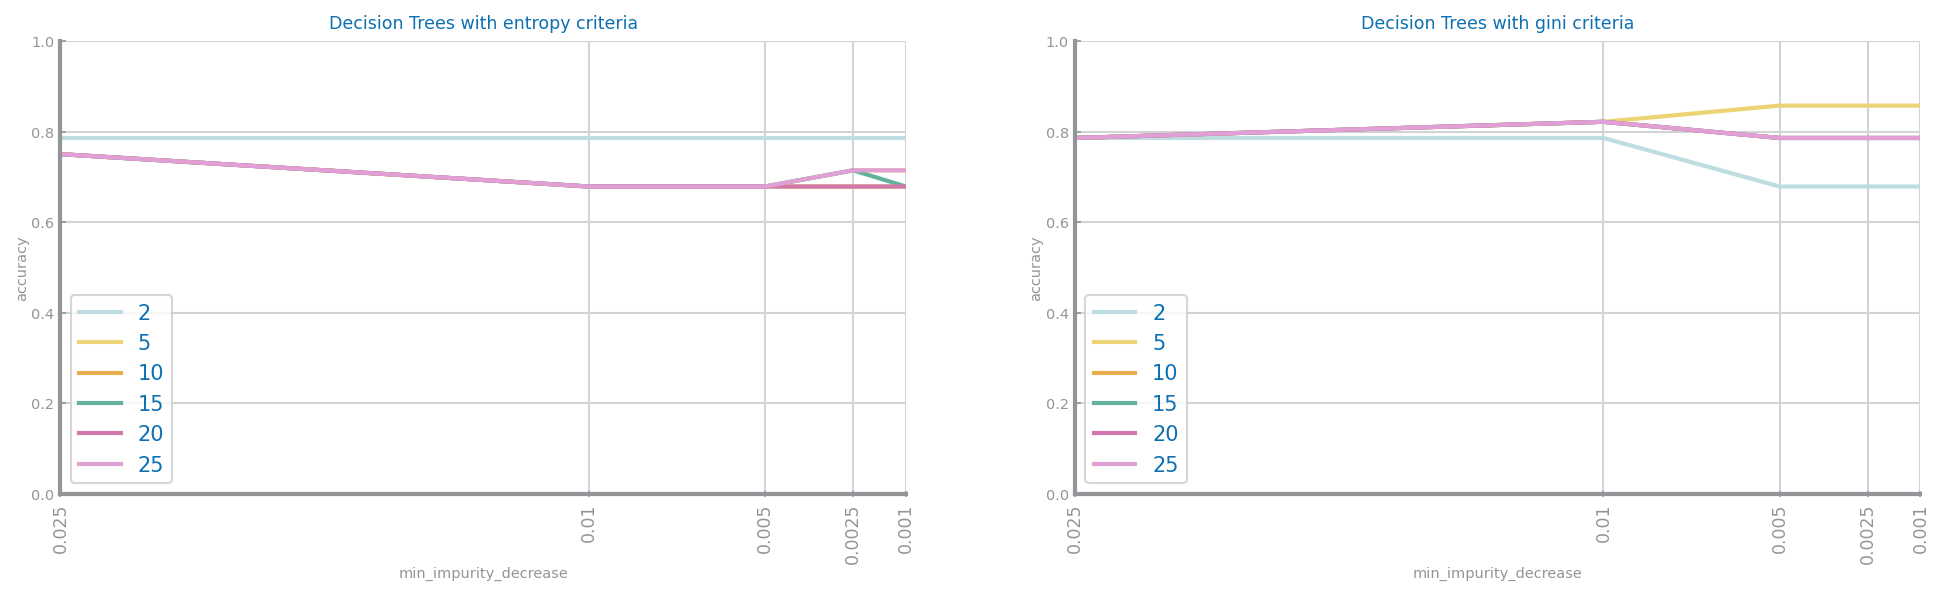

Best results achieved with gini criteria, depth=5 and min_impurity_decrease=0.01 ==> accuracy=0.86


<Figure size 600x450 with 0 Axes>

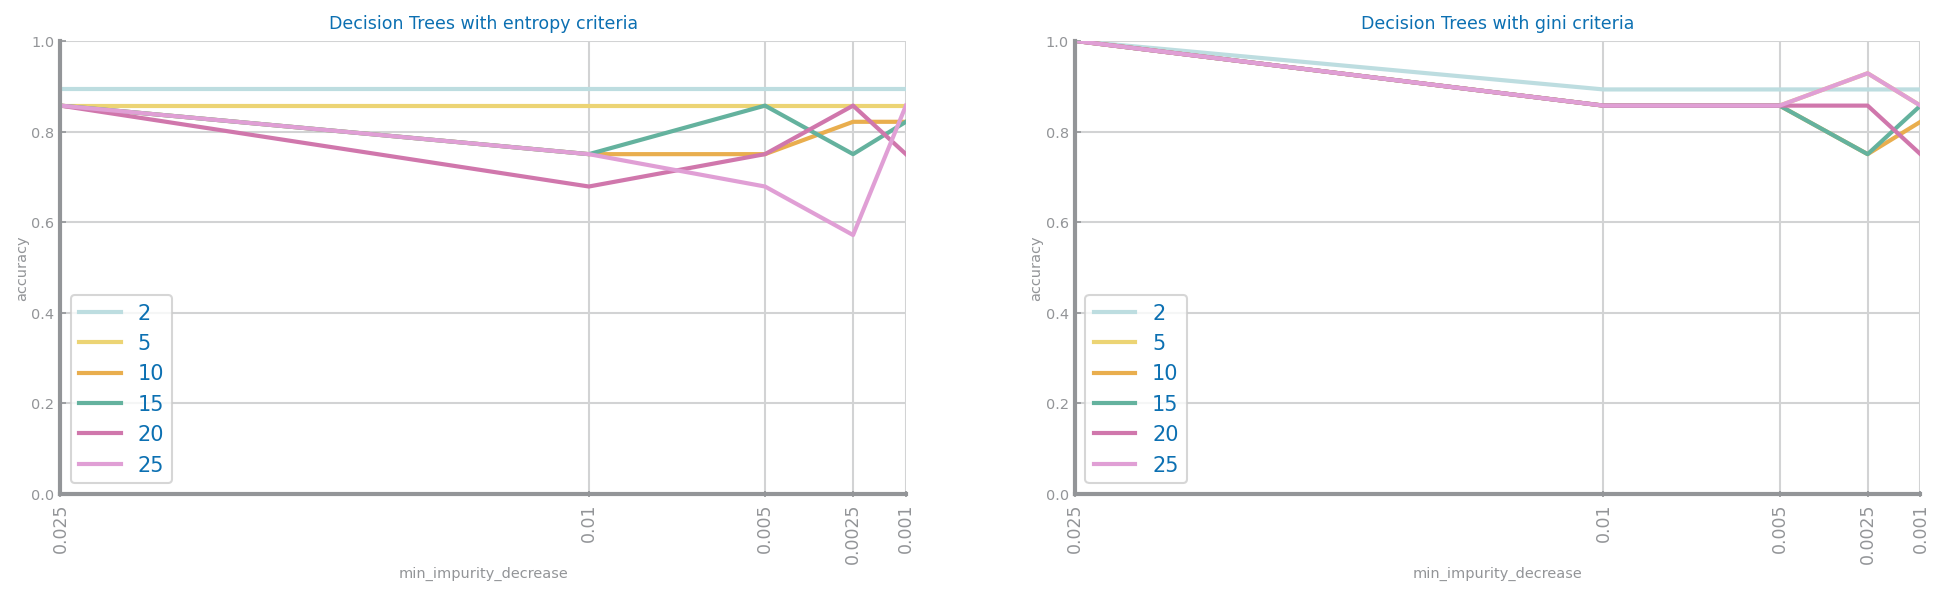

Best results achieved with gini criteria, depth=2 and min_impurity_decrease=0.03 ==> accuracy=1.00


<Figure size 600x450 with 0 Axes>

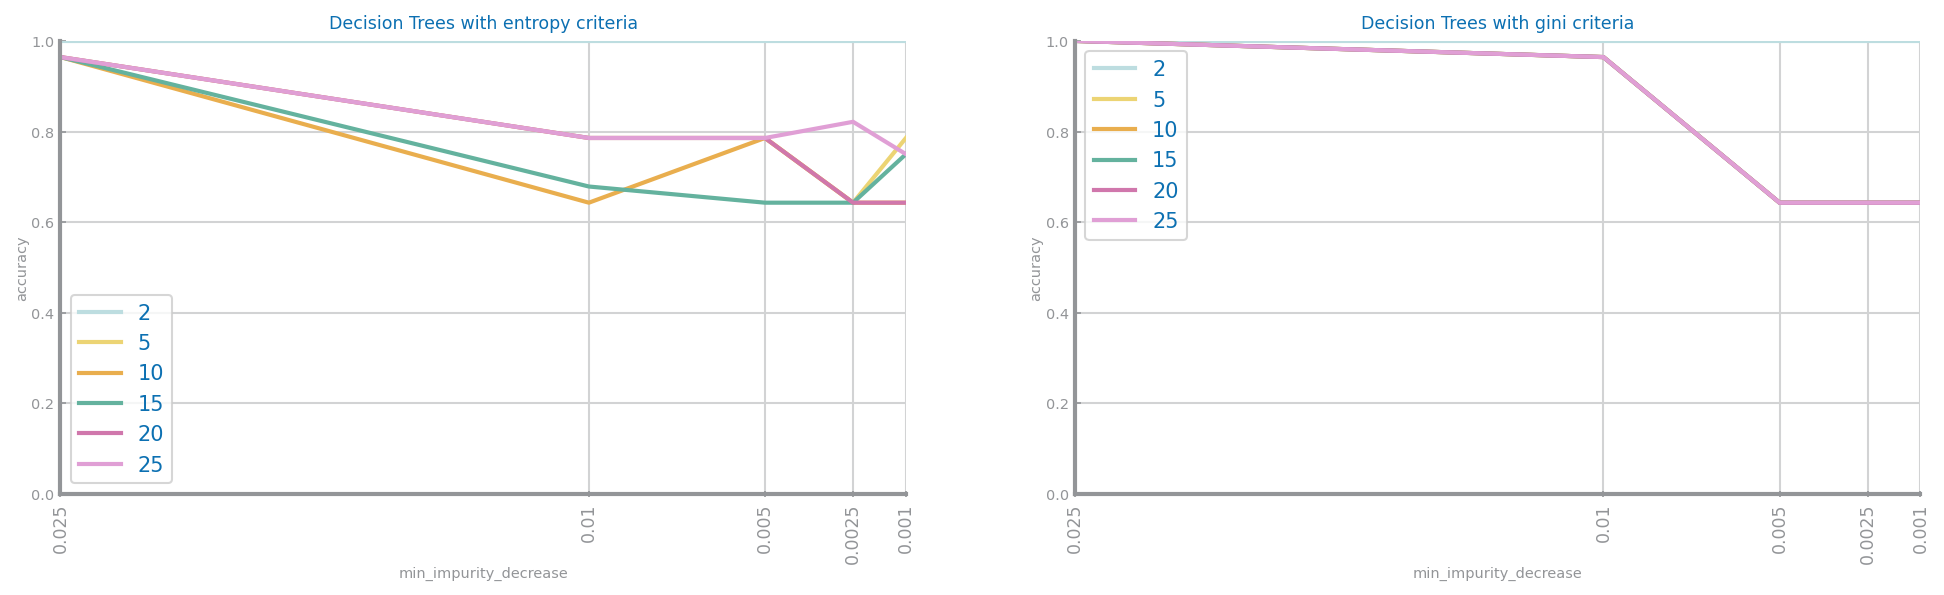

Best results achieved with entropy criteria, depth=2 and min_impurity_decrease=0.03 ==> accuracy=1.00


<Figure size 600x450 with 0 Axes>

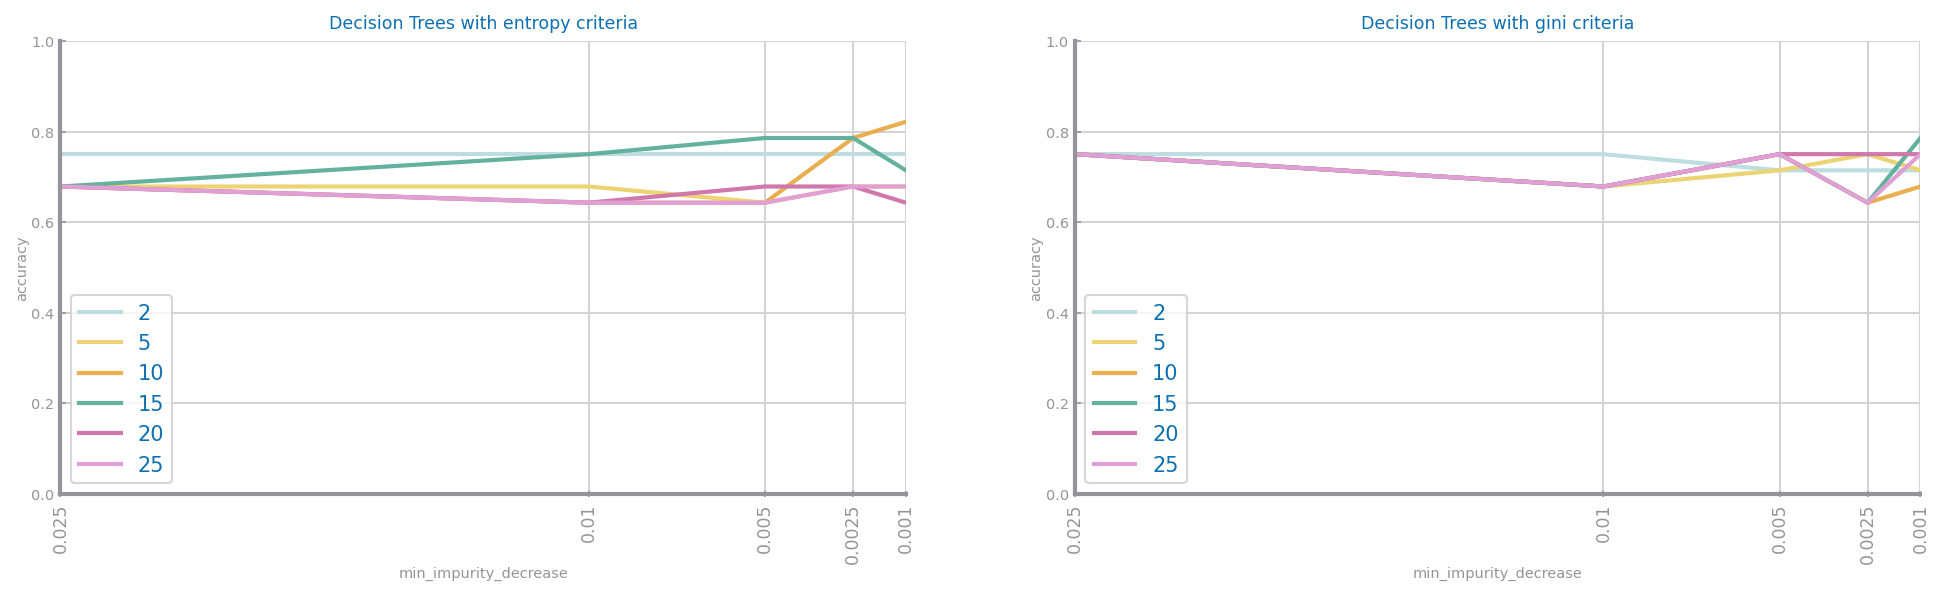

Best results achieved with entropy criteria, depth=10 and min_impurity_decrease=0.00 ==> accuracy=0.82


<Figure size 600x450 with 0 Axes>

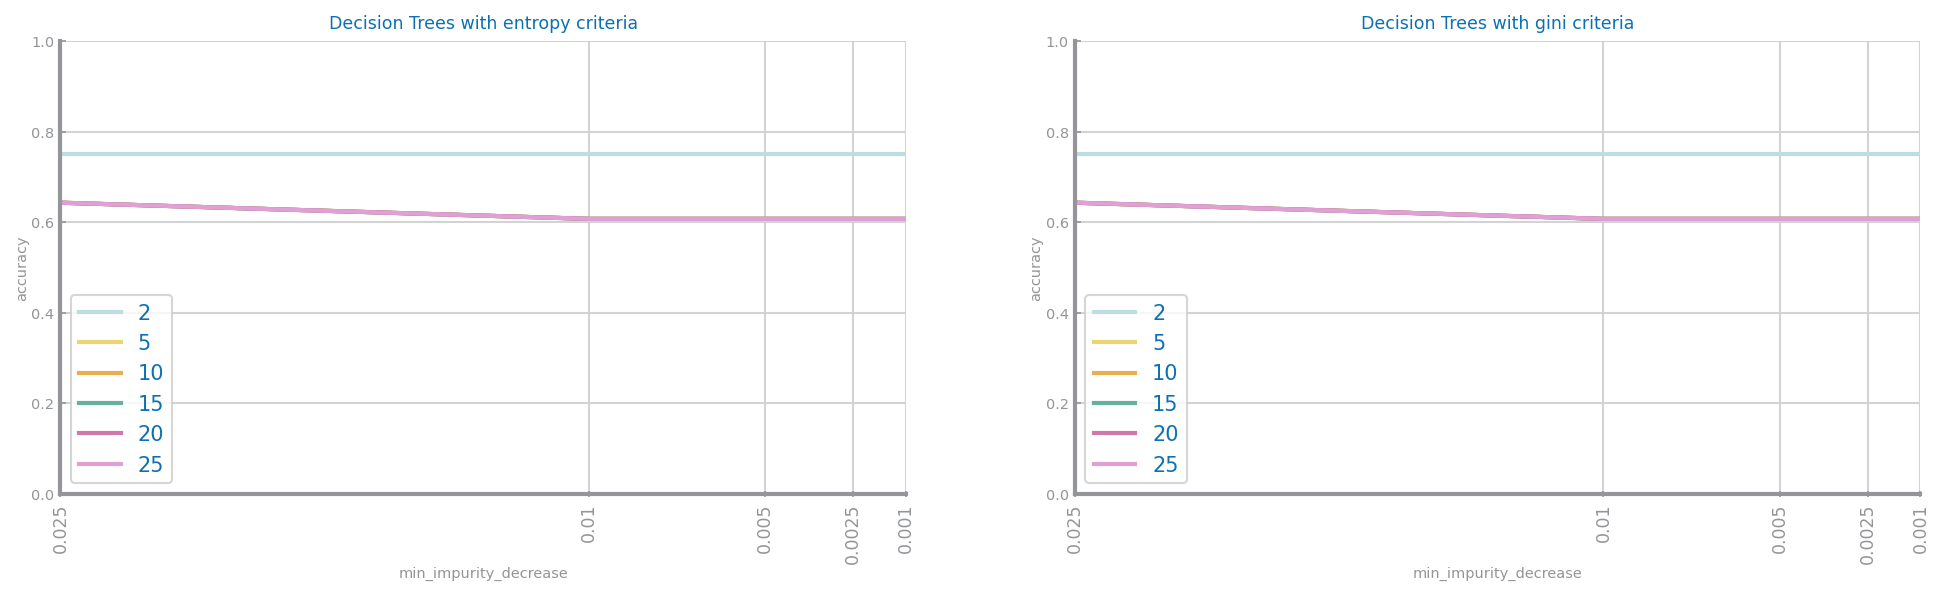

Best results achieved with entropy criteria, depth=2 and min_impurity_decrease=0.03 ==> accuracy=0.75


<Figure size 600x450 with 0 Axes>

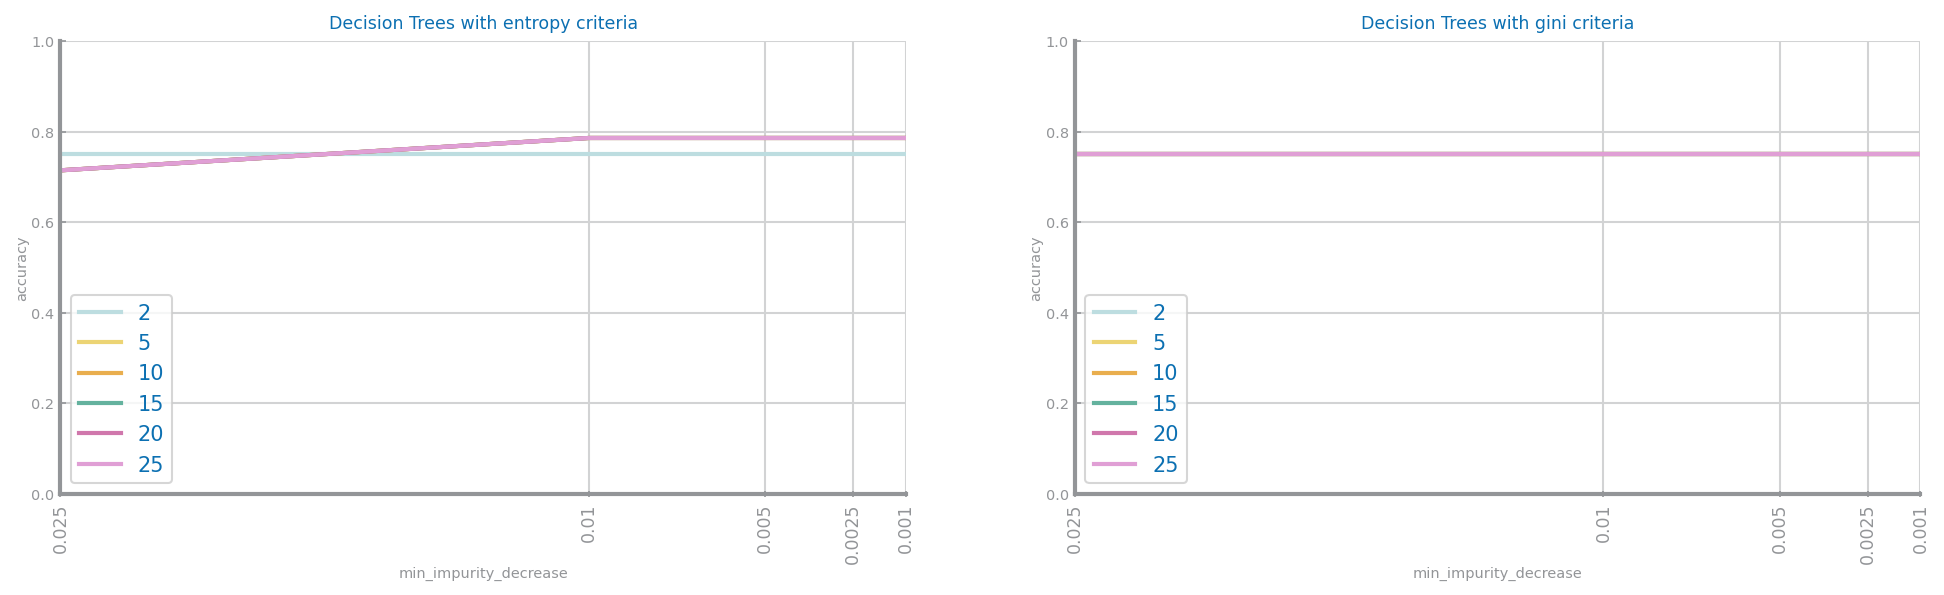

Best results achieved with entropy criteria, depth=5 and min_impurity_decrease=0.01 ==> accuracy=0.79


<Figure size 600x450 with 0 Axes>

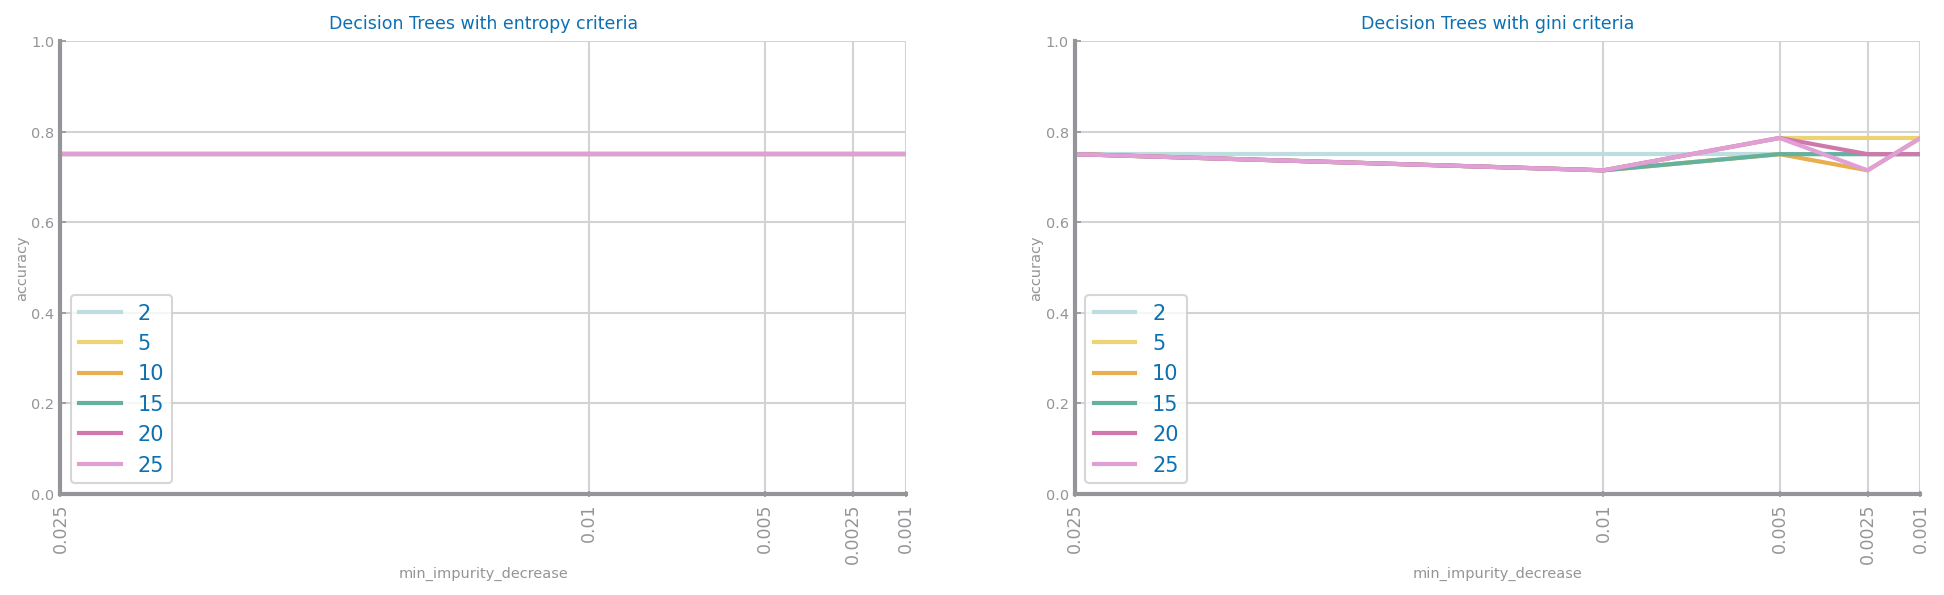

Best results achieved with gini criteria, depth=5 and min_impurity_decrease=0.01 ==> accuracy=0.79
Confusion Matrix Test
TruePositives:  1
FalsePositives:  0
TrueNegatives:  21
FalseNegatives:  6


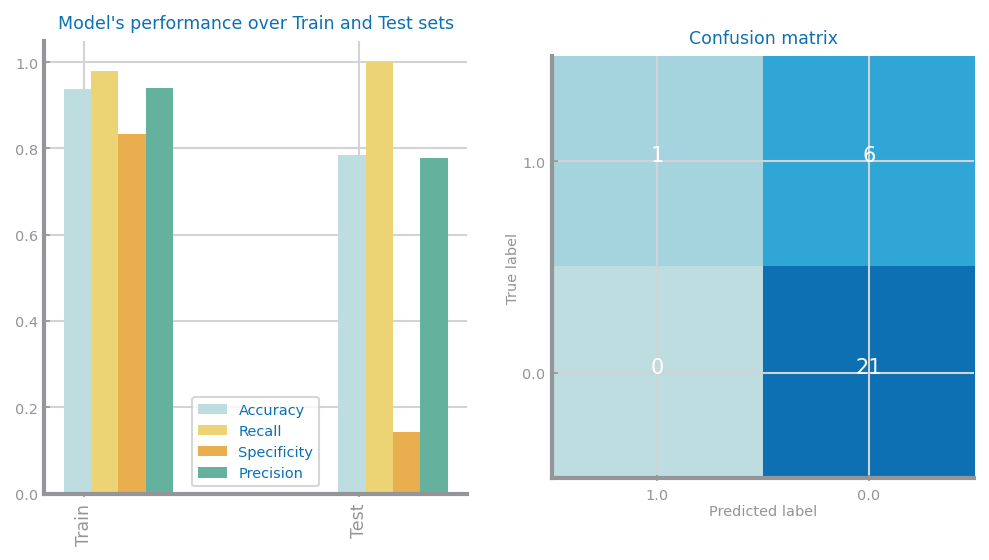

In [38]:
decision_tree_kfold(num_splits_kfold=8, data=norm_data_minmax_clean, n=3, stratified=True)

<Figure size 600x450 with 0 Axes>

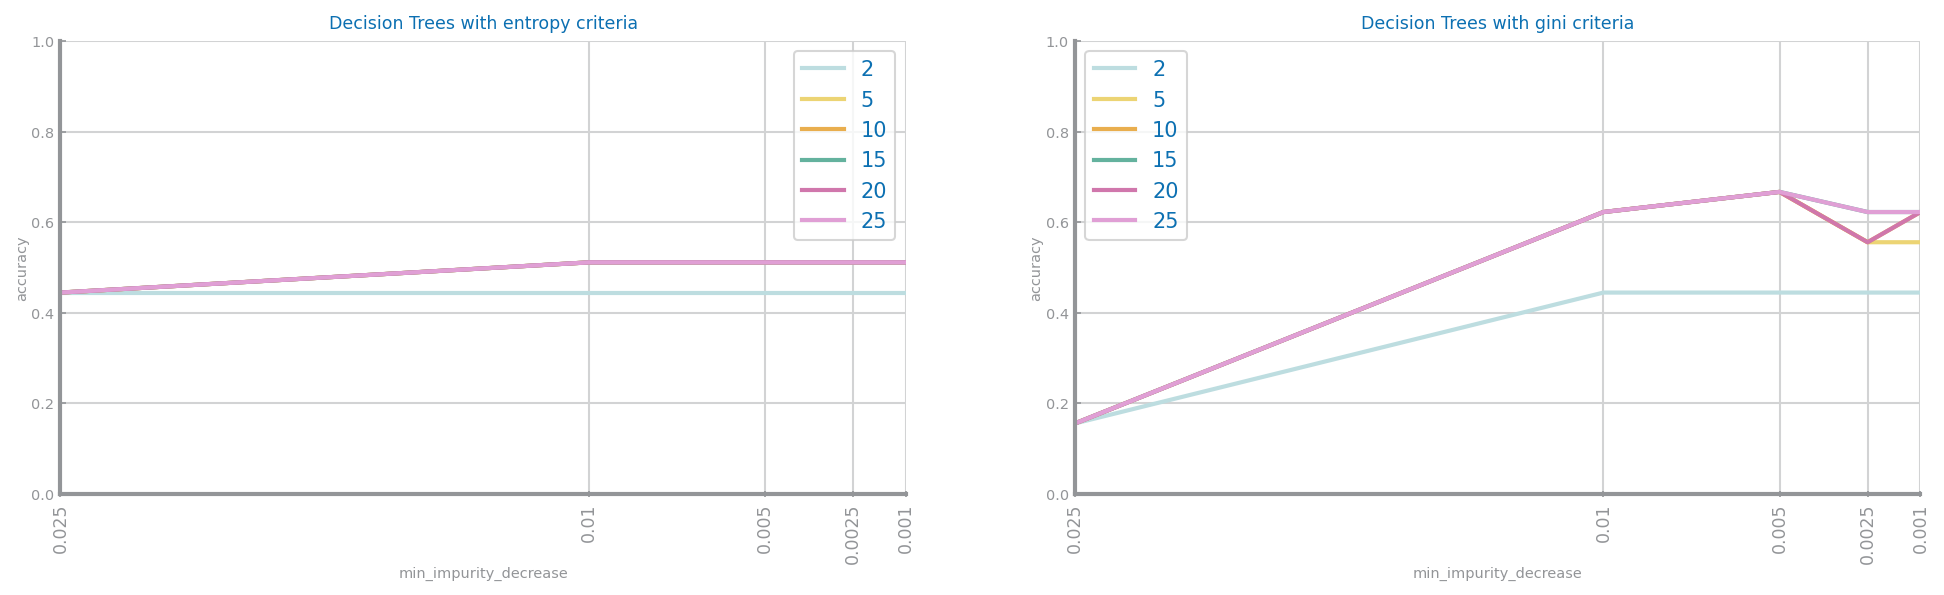

Best results achieved with gini criteria, depth=5 and min_impurity_decrease=0.01 ==> accuracy=0.67


<Figure size 600x450 with 0 Axes>

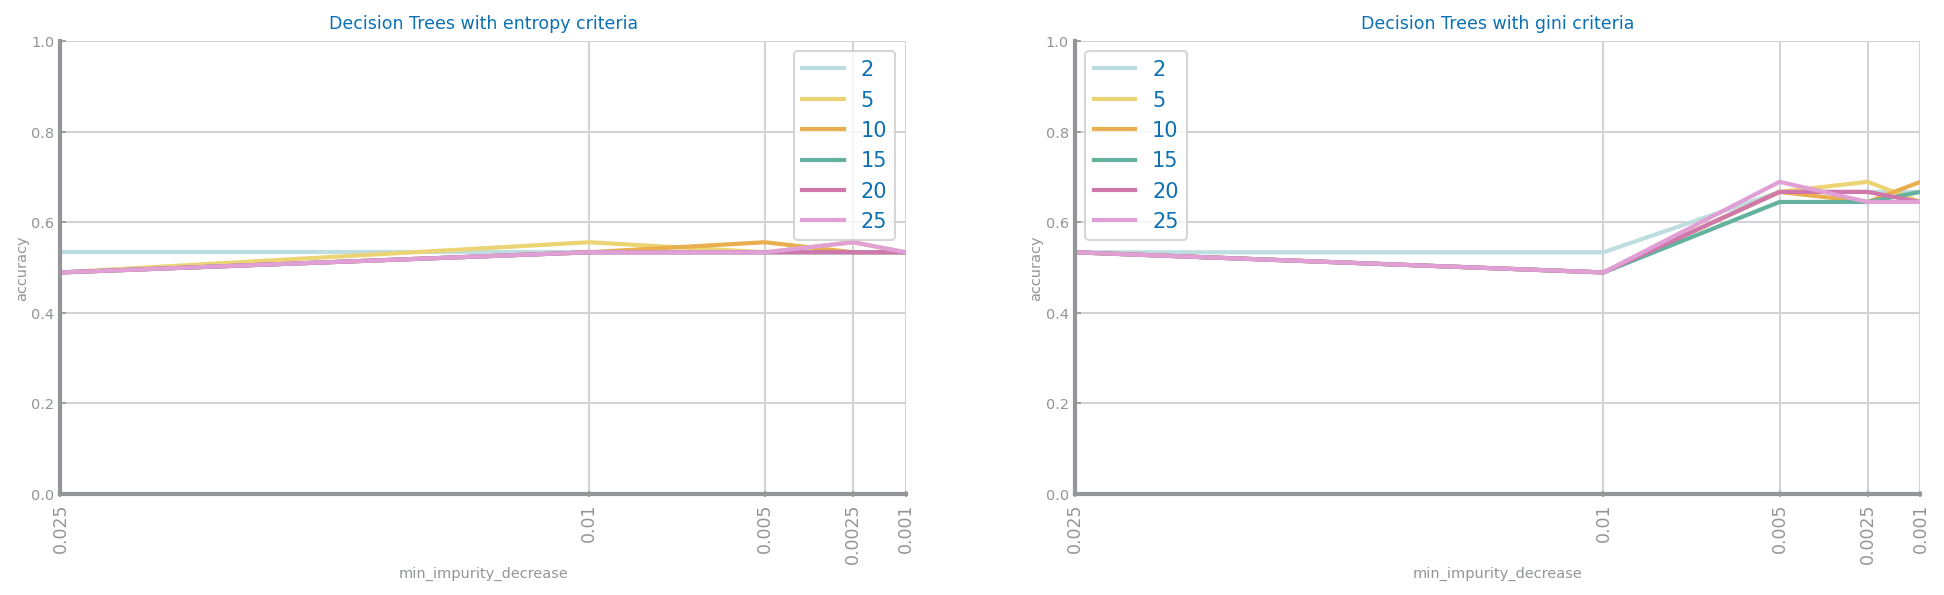

Best results achieved with gini criteria, depth=5 and min_impurity_decrease=0.00 ==> accuracy=0.69


<Figure size 600x450 with 0 Axes>

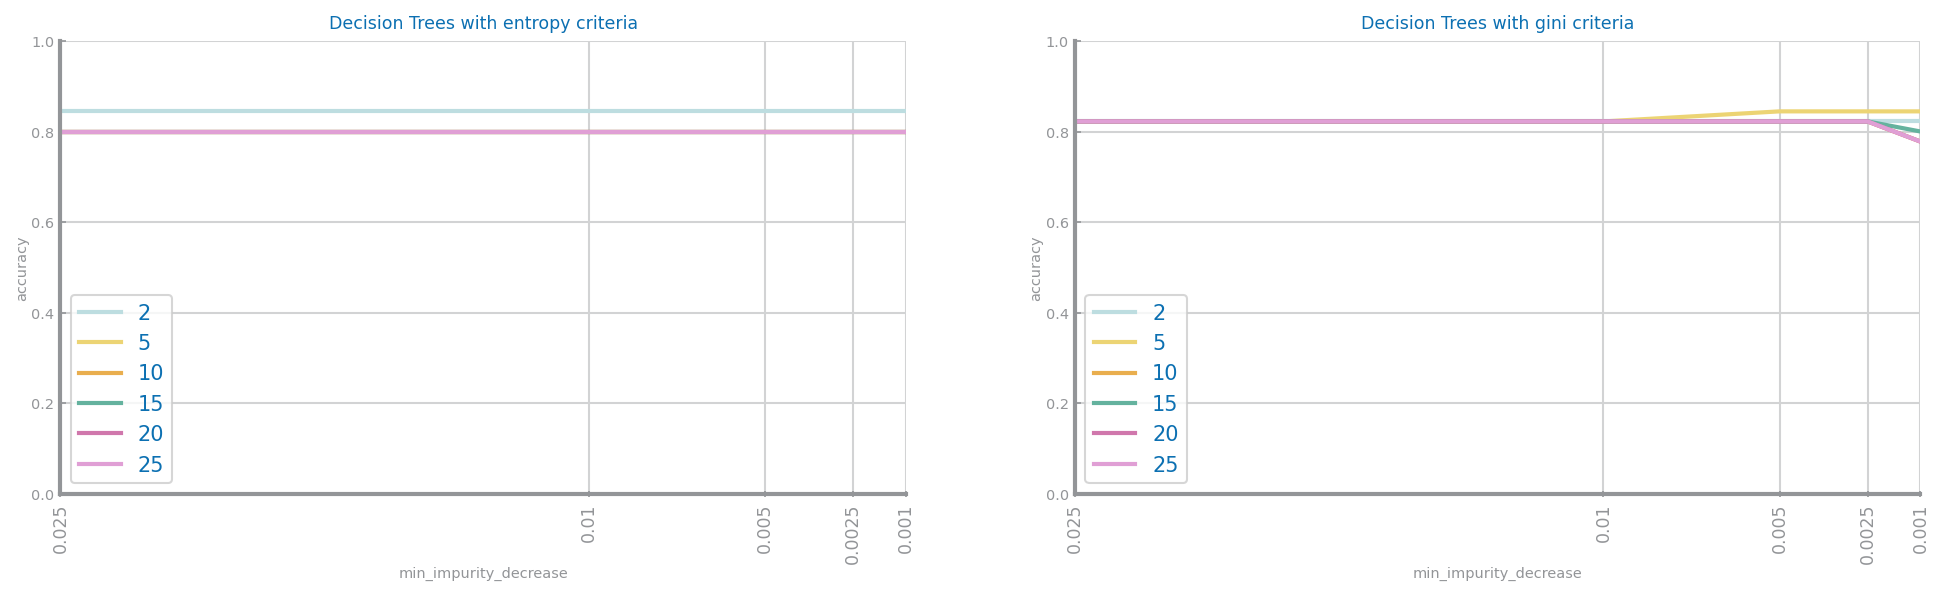

Best results achieved with entropy criteria, depth=2 and min_impurity_decrease=0.03 ==> accuracy=0.84


<Figure size 600x450 with 0 Axes>

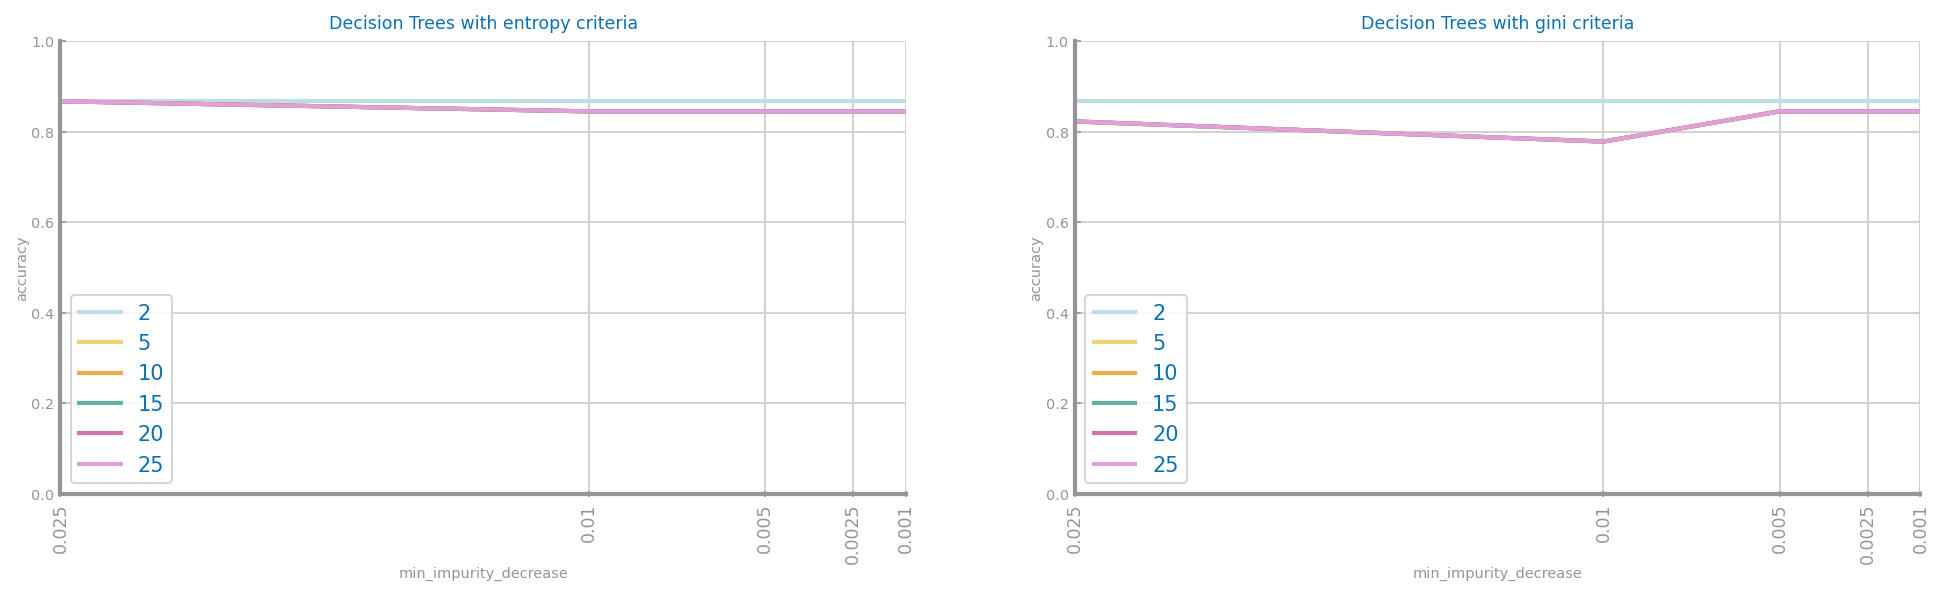

Best results achieved with entropy criteria, depth=2 and min_impurity_decrease=0.03 ==> accuracy=0.87


<Figure size 600x450 with 0 Axes>

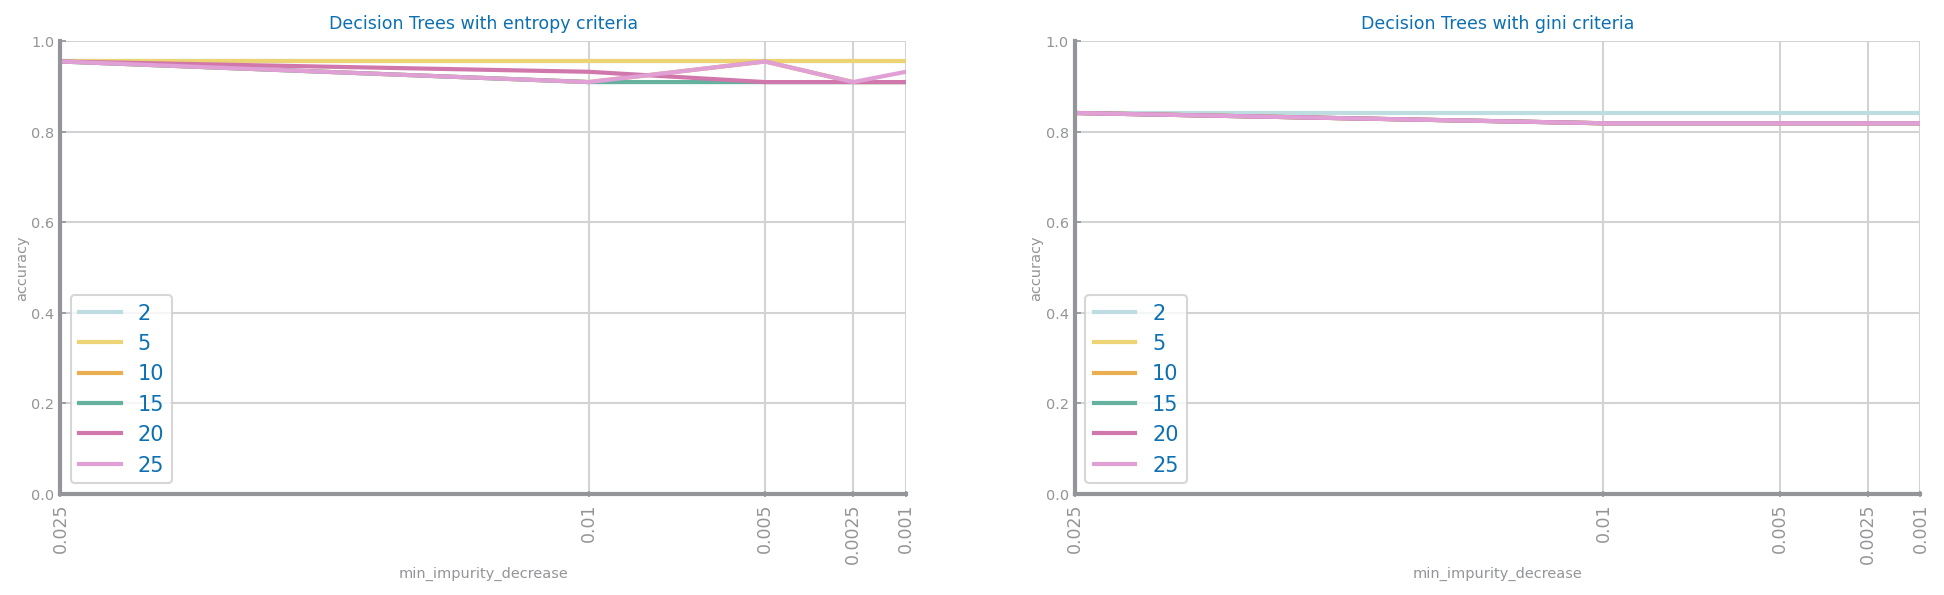

Best results achieved with entropy criteria, depth=2 and min_impurity_decrease=0.03 ==> accuracy=0.95
Confusion Matrix Test
TruePositives:  0
FalsePositives:  0
TrueNegatives:  42
FalseNegatives:  2


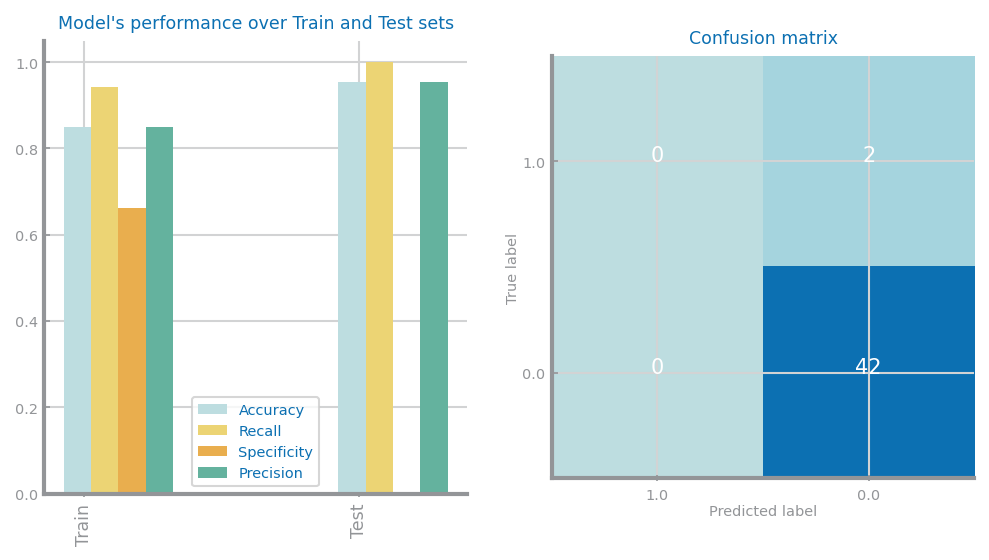

In [39]:
decision_tree_kfold(num_splits_kfold=5, data=norm_data_minmax_clean, n=3, stratified=False)

# Overfitting